## Extracting Reviews from Amazon Website - BeautifulSoup

#### We have extracted the reviews of Alexa-Echo_Dot

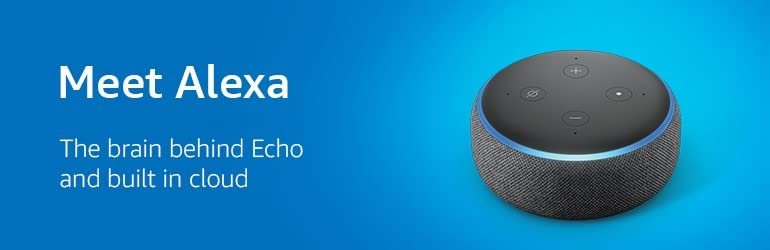

### Import Libraries

In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

### Connect to Website

In [2]:
url='https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [3]:
page=requests.get(url)
page

<Response [200]>

In [4]:
soup=BeautifulSoup(page.text, 'html.parser')
print(soup.title.text)

Amazon.in:Customer reviews: Echo Dot (3rd Gen) – New and improved smart speaker with Alexa (Black)


### Extracing the required data

In [5]:
# Information will get by inspecting the web page
reviews=soup.find_all('div',{'data-hook':'review'})

In [6]:
review_ratings=[]
for item in reviews:
    customer=item.find('span', class_='a-profile-name').text.strip()
    title=item.find('a',{'data-hook':'review-title'}).text.strip()
    rating = float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip())
    body = item.find('span',{'data-hook':'review-body'}).text.strip()
    review = {'Customer_name':customer,'Highlight':title,'Ratings': rating, 'Description': body}
    review_ratings.append(review)
    

In [7]:
web_data=pd.DataFrame(review_ratings)
web_data

,Customer_name,Highlight,Ratings,Description
0,Shilpa,Alexa cannot hear once she starts playing,1.0,The media could not be loaded.\n ...
1,Vikas Singh,Not that useful,3.0,I purchased this as a birthday gift for my 7 y...
2,Sumit,"Echo Dot never plays original songs, (No way t...",1.0,The media could not be loaded.\n ...
3,Kumar Gautam,Not satisfied with the wipro smart bulb its no...,1.0,I bought this product to gift some one else an...
4,One of Amazon lover🎭,Good Alexa with 'incompatible' smart wipro💡,4.0,Alexa is very good but came with defective sma...
5,Amazon Customer,Super smart speaker 🔊👏🏻👌🏻👍🏻,5.0,The media could not be loaded.\n ...
6,Bhuvan Luthra,Alexa a chinese agent,1.0,The media could not be loaded.\n ...
7,Monu,Very good product,5.0,Bhut hi Achha hai aur bhut achhe se kam karta hai
8,Thakur Ankur Kumar Pratap singh,I recommend one more accessory,5.0,Its just one if the best deal i ever got on am...
9,Akash singh nishad,No warranty should be given to you so be alert...,1.0,The media could not be loaded.\n ...


### Scrapping data from Multiple pages

In [8]:
reviews_ratings = []
for j in range(1, 21):
    link = 'https://www.amazon.in/Echo-Dot-3rd-Gen/product-reviews/B07PFFMP9P/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber='
    page = requests.get(link + str(j))
    soup = BeautifulSoup(page.content, 'html.parser')
    lists = soup.find_all('div', {'data-hook':'review'})

    for i in lists:
        customer=i.find('span', class_='a-profile-name').text.strip()
        title=i.find('a',{'data-hook':'review-title'}).text.strip()
        review = i.find('span',{'data-hook':'review-body'}).text.strip()
        rating = float(i.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars','').strip())
        info = {'Customer_name':customer,'Highlight':title,'Ratings': rating, 'Description': review}
        reviews_ratings.append(info)

df_info=pd.DataFrame(reviews_ratings)

In [9]:
df_info

,Customer_name,Highlight,Ratings,Description
0,Shilpa,Alexa cannot hear once she starts playing,1.0,The media could not be loaded.\n ...
1,Vikas Singh,Not that useful,3.0,I purchased this as a birthday gift for my 7 y...
2,Sumit,"Echo Dot never plays original songs, (No way t...",1.0,The media could not be loaded.\n ...
3,Kumar Gautam,Not satisfied with the wipro smart bulb its no...,1.0,I bought this product to gift some one else an...
4,One of Amazon lover🎭,Good Alexa with 'incompatible' smart wipro💡,4.0,Alexa is very good but came with defective sma...
...,...,...,...,...
175,RAJAGOPAL,Good hardware but poor software,5.0,Its one of the finest smart speaker in indian ...
176,Brijesh Maurya,"Dont expect it to do wonders, its needs a othe...",3.0,"Well, good for kids but for the most part AI n..."
177,Ramesh Adhavaraju,"Good product, value for money",5.0,"Product is good, after using for a month, felt..."
178,Shaik shafi,Don't respond to commands even buttons not wor...,1.0,I bought it 2 days backI turn off charging dur...


### Saving to CSV file

In [10]:
df_info.to_csv('Amazon_reviews.csv')